In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn.objects as so
import seaborn as sns 
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import plotly.express as px

<H1>Analysis Price Distribution</H1>

In [2]:
# First Read Each data from AirBnN
listing = pd.read_csv('data/listing.csv', index_col='Unnamed: 0')
neighbourhood = pd.read_csv('data/neighbourhood.csv', index_col='Unnamed: 0')
reviews = pd.read_csv('data/reviews.csv', index_col='Unnamed: 0')

In [3]:
#identify kind of Data 
listing.info()
neighbourhood.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 0 to 4160
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4161 non-null   int64  
 1   name              4161 non-null   object 
 2   host_id           4161 non-null   int64  
 3   host_name         4161 non-null   object 
 4   neighbourhood     4161 non-null   object 
 5   latitude          4161 non-null   float64
 6   longitude         4161 non-null   float64
 7   room_type         4161 non-null   object 
 8   price             4161 non-null   int64  
 9   minimum_nights    4161 non-null   int64  
 10  availability_365  4161 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 390.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood

In [4]:
#merging data Listing And Neighbourhood for fill neighbourhood_group 
df = listing.merge(neighbourhood, how='left', on='neighbourhood')
df.info() # All Data is NoNull 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 0 to 4160
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4161 non-null   int64  
 1   name                 4161 non-null   object 
 2   host_id              4161 non-null   int64  
 3   host_name            4161 non-null   object 
 4   neighbourhood        4161 non-null   object 
 5   latitude             4161 non-null   float64
 6   longitude            4161 non-null   float64
 7   room_type            4161 non-null   object 
 8   price                4161 non-null   int64  
 9   minimum_nights       4161 non-null   int64  
 10  availability_365     4161 non-null   int64  
 11  neighbourhood_group  4161 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 422.6+ KB


In [5]:
#identify of neighbourhood_group unique is same or not 
df['neighbourhood_group'].unique().sort() == neighbourhood['neighbourhood_group'].unique().sort()

True

In [6]:
#CASE FIND A DISTRIBUTION DATA

# Processing data for Analytics get 'neighbourhood_group','room_type','price'
df_price_distribution = df[['neighbourhood_group','room_type','price']]
price_0 = df_price_distribution[df_price_distribution['price'] == 0].index
df_price_distribution = df_price_distribution.drop(price_0, axis=0)  
df_price_distribution = df_price_distribution.sort_values(by=['price'])


In [7]:
# Make a categorical of Data 
data = [0]
while data[-1] <=12494:
    data.append(data[-1]+400)

df_price_distribution['range_price']= pd.cut(df_price_distribution['price'], data)
df_price_distribution['range_price'] = df_price_distribution.range_price.astype(str).str.replace(r'[,(]', '', regex = True).replace(r'[]$]', '', regex = True).replace(r'[\D]', '-', regex = True)
df_price_distribution['price'] = df_price_distribution['price'].astype(int)
df_price_distribution.sort_values(by=['range_price'],ascending=False)
df_price_distribution.head()


,neighbourhood_group,room_type,price,range_price
1028,North-East Region,Private room,13,0-400
3810,West Region,Private room,14,0-400
3447,North Region,Private room,14,0-400
3118,North Region,Private room,15,0-400
3446,North Region,Private room,16,0-400


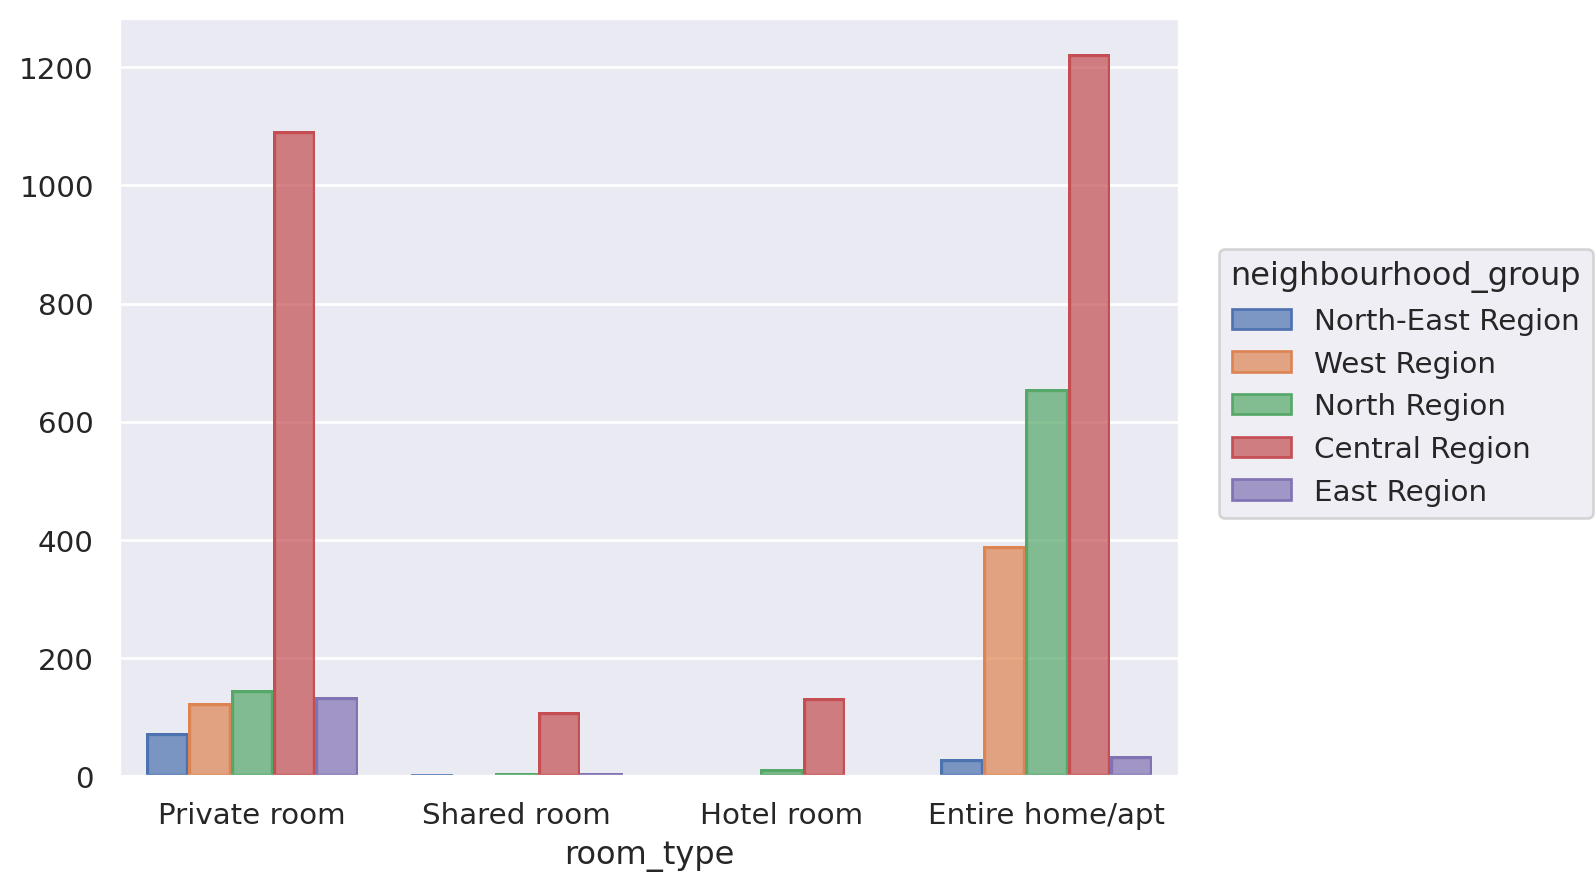

In [8]:
#Vizualization by General Data 
p = so.Plot(df_price_distribution, x="room_type", color='neighbourhood_group')
p.add(so.Bar(),so.Count(), so.Dodge())

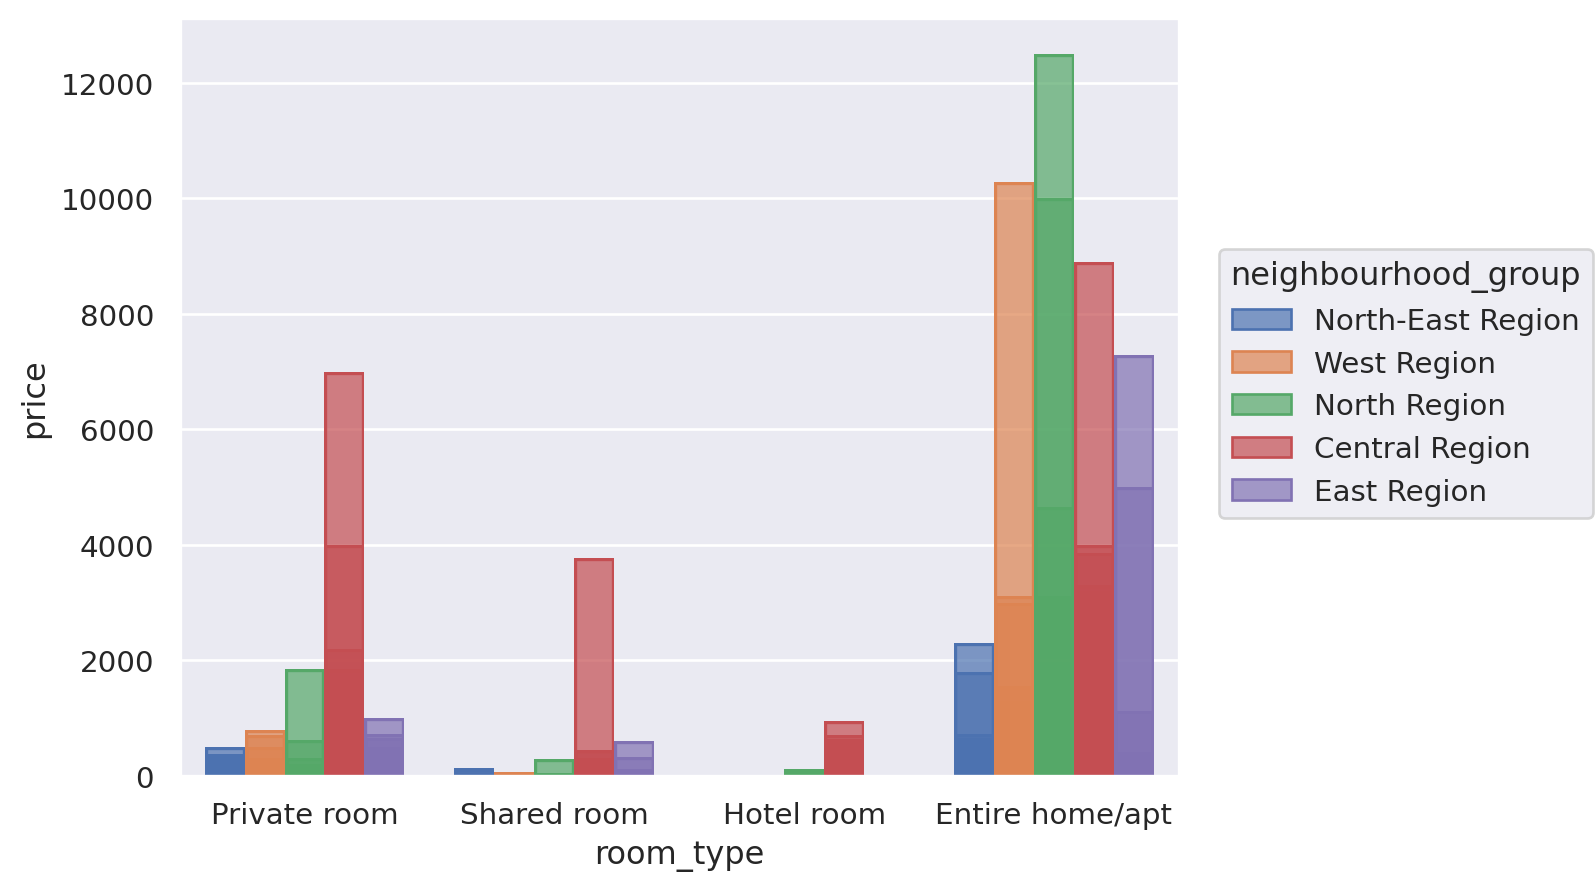

In [9]:
p = so.Plot(df_price_distribution, x="room_type", y='price' , color='neighbourhood_group')
p.add(so.Bar(), so.Dodge())

<Axes: xlabel='price', ylabel='Count'>

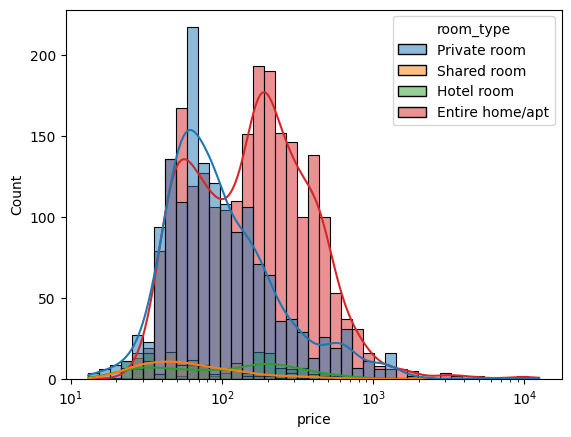

In [10]:
sns.histplot(data=df_price_distribution, x="price",log_scale=True, hue='room_type', kde=True)
